![](../../assets/Captura%20de%20Tela%202025-05-04%20às%2020.31.32.png)

# Interpretaçao Estatistica

![](../../assets/Captura%20de%20Tela%202025-05-04%20às%2020.52.43.png)

In [63]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [64]:
mu_H0 = 0  # média da hipótese nula
mu_H1 = 1  # média da hipótese alternativa
desvio_padrao = 1
tamanho_amostra = 3
alpha = 0.05 # Valor critico do P-VALUE

# Sorteio de 100 sequências com 3 valores da distribuição azul (H1)

In [76]:
np.random.seed(42)
amostras = np.random.normal(loc=mu_H1, scale=desvio_padrao, size=(100, tamanho_amostra))

# Calcular P-Value apartir da Gaussiana Vermelha

In [78]:
medias = amostras.mean(axis=1)

z_scores = (medias - mu_H0) / (desvio_padrao / np.sqrt(tamanho_amostra))
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

print("\nP-values (em %):")
print(np.round(p_values * 100, 2))
# Determinar falsos negativos (p > alpha)
falsos_negativos = p_values > alpha
taxa_falsos_negativos = np.mean(falsos_negativos)


P-values (em %):
[2.070e+00 1.920e+00 4.900e-01 1.313e+01 8.191e+01 3.153e+01 2.155e+01
 4.133e+01 4.138e+01 1.516e+01 1.440e+00 3.727e+01 9.636e+01 1.770e+00
 5.236e+01 9.670e+00 2.715e+01 1.410e+01 1.730e+00 2.100e+00 4.780e+01
 2.180e+00 1.320e+00 1.400e+00 2.704e+01 3.710e+00 6.096e+01 1.270e+00
 1.326e+01 5.580e+00 5.210e+00 6.373e+01 3.970e+00 5.916e+01 3.281e+01
 1.600e-01 4.654e+01 1.500e-01 7.590e+00 3.150e+00 1.340e+00 1.150e+00
 3.731e+01 5.581e+01 3.891e+01 4.670e+00 1.047e+01 9.590e+00 1.054e+01
 1.492e+01 9.220e+00 1.046e+01 1.660e+00 4.520e+00 1.300e+00 4.000e-02
 5.211e+01 1.575e+01 1.750e+00 1.000e-02 3.270e+01 2.180e+00 1.404e+01
 2.739e+01 2.163e+01 1.253e+01 1.894e+01 1.000e-01 4.886e+01 0.000e+00
 1.100e-01 1.810e+00 3.849e+01 4.160e+00 3.551e+01 7.580e+00 1.971e+01
 1.318e+01 3.030e+00 5.120e+00 1.337e+01 1.784e+01 3.570e+00 7.710e+00
 7.400e-01 7.580e+00 5.740e+00 4.442e+01 7.060e+00 4.667e+01 1.610e+00
 1.504e+01 1.234e+01 5.030e+00 1.600e-01 3.914e+01 1.572e+0

# Criando as 2 Gaussianas

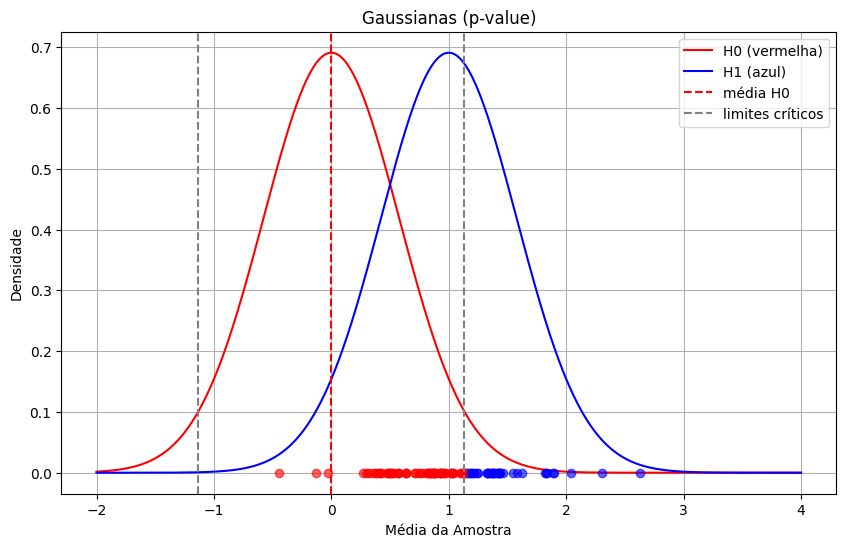

In [75]:
x = np.linspace(-2, 4, 1000)
pdf_H0 = norm.pdf(x, loc=mu_H0, scale=desvio_padrao/np.sqrt(tamanho_amostra))
pdf_H1 = norm.pdf(x, loc=mu_H1, scale=desvio_padrao/np.sqrt(tamanho_amostra))

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_H0, 'r-', label='H0 (vermelha)')
plt.plot(x, pdf_H1, 'b-', label='H1 (azul)')

for i in range(len(medias)):
    cor = 'red' if falsos_negativos[i] else 'blue'
    plt.plot(medias[i], 0, 'o', color=cor, alpha=0.6)

plt.axvline(mu_H0, color='red', linestyle='--', label='média H0')

z_critico = norm.ppf(1 - alpha/2)
limite_inf = mu_H0 - z_critico * (desvio_padrao / np.sqrt(tamanho_amostra))
limite_sup = mu_H0 + z_critico * (desvio_padrao / np.sqrt(tamanho_amostra))
plt.axvline(limite_inf, color='gray', linestyle='--', label='limites críticos')
plt.axvline(limite_sup, color='gray', linestyle='--')

plt.title("Gaussianas (p-value)")
plt.xlabel("Média da Amostra")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

# Calcular taxa de falsos negativos para P-Value > 5%

In [73]:
taxa_falsos_negativos = np.mean(falsos_negativos)
print(f"\nTaxa de falsos negativos (p > {alpha}): {taxa_falsos_negativos:.2%}")



Taxa de falsos negativos (p > 0.05): 62.00%
